EXERCISE 1

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

The solution of the SDE is St...
 in each perio the St value is uploaded, hence it restart from S t-1


In [3]:
lista = []
#create the empty list
n = 365*10
dt = 1.0/365.0 #because the increment is yearly compounded divide by 365
sdt = np.sqrt(dt)#perchè sdt? ha questa forma?
mu=0.06
sig=0.2
dz = np.random.randn(n)*sdt #values taken by the process the b.m

# Solution to the SDE:
lista=100*np.exp(np.cumsum( (mu*-0.5*sig*sig)*dt+sig*dz ))

PLOT

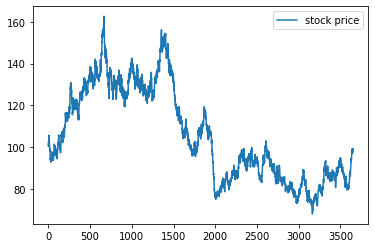

In [4]:
# Plot Share Price
plt.plot(lista, label='stock price')
plt.legend()
plt.show()

Daily compounded returns

In [5]:
# compute continuosly compounded returns
#prva a faro con shift
ret = (lista[1 :]-lista[: -1]) / lista[: -1]
ret = np.log(ret+1) # remember +1 per log
  

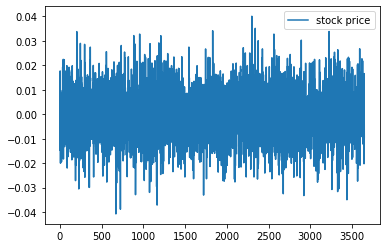

In [6]:
# Plot Returns
plt.plot(ret, label='stock price')
plt.legend()
plt.show()

In [7]:
#compute annualized mu and sigma of log returns
mu_hat = np.mean(365*ret)
sigma_hat = np.std(365*ret)
print(mu_hat,sigma_hat)


-0.003497070277617242 3.8417399589933687


PROBLEM 2

In [8]:
#import packages
import pandas as pd

In [9]:
#create a series
index=pd.period_range(start="1950-01-01", end="2020-12-31", freq="D")
dz_2 = np.random.randn(np.size(index))*sdt #values taken by the process the b.m

# Solution to the SDE:
data=100*np.exp(np.cumsum( (mu*-0.5*sig*sig)*dt+sig*dz_2 ))

#make series
sr=pd.Series(data, index)


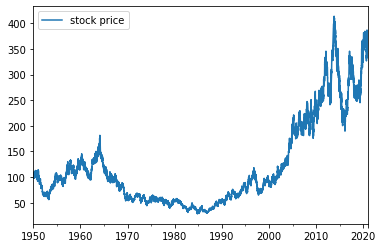

In [10]:
# plot daily share price
# Plot Share Price
sr.plot(label='stock price')
plt.legend()
plt.show()

In [11]:
#convert from days to month
msr=sr.resample("M").mean()



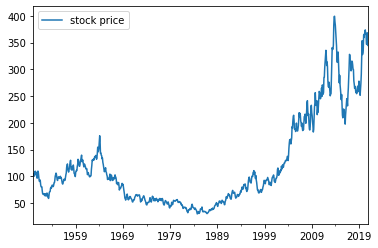

In [12]:
#plot monthly based
msr.plot(label='stock price')
plt.legend()
plt.show()

PROBLEM 3

In [13]:
#daily prices
d_prices= sr
#create weekly prices 
w_prices = sr.resample("W").last()
#create monthly prices
m_prices = sr.resample("M").last()
#estimates return daily
retu = (sr.shift() - sr) / sr
retu = np.log(retu + 1)
idx = pd.period_range(start="1950-01-02", end="2020-12-31", freq="D")
#estimates return weekly
retu_w = (w_prices.shift()-w_prices) / w_prices
retu_w = np.log(retu_w + 1)
idx_w = pd.period_range(start="1950-01-08", end="2020-12-31", freq="W")

#estimates return monthly
retu_m = (m_prices.shift()- m_prices) / m_prices
retu_m = np.log(retu_m + 1)
idx_m = pd.period_range(start="1950-02-01", end="2020-12-31", freq="M")

#create the series daily
sretu_d = pd.Series(retu,idx)
#create the series daily
sretu_w = pd.Series(retu_w,idx_w)
#create the series daily
sretu_m = pd.Series(retu_m,idx_m)



In [14]:
#summary statistics
sretu_d.describe()
sretu_w.describe()
sretu_m.describe()

count    851.000000
mean      -0.001403
std        0.057903
min       -0.175061
25%       -0.041072
50%        0.000410
75%        0.037754
max        0.176145
dtype: float64

In [15]:
#mean and std dev for each frequency
#daily
mu_hat_d = 365*sretu_d.mean()
sigma_hat_d = 365*sretu_d.std()
print(mu_hat_d,sigma_hat_d)
#weekly
mu_hat_w = 52*sretu_w.mean()
sigma_hat_w = 52*sretu_w.std()
print(mu_hat_w,sigma_hat_w)
#monthly
mu_hat_m = 12*sretu_m.mean()
sigma_hat_m = 12*sretu_m.std()
print(mu_hat_m,sigma_hat_m)

-0.017565211443001445 3.82742568570707
-0.017515061307951413 1.4434607710352199
-0.016830612711152926 0.6948380941828363


In [16]:
#rolling window (one-year window)
#average
sretu_d_r = 365*sretu_d.rolling(365).mean()
sretu_w_r = 52*sretu_w.rolling(52).mean()
sretu_m_r = 12*sretu_m.rolling(12).mean()
sretu_w_r.dropna()
sretu_d_r.dropna()
sretu_m_r.dropna()
#standard deviation
sretu_d_r_std = 365*sretu_d.rolling(365).std()
sretu_w_r_std = 52*sretu_w.rolling(52).std()
sretu_m_r_std = 12*sretu_m.rolling(12).std()
sretu_w_r_std.dropna()
sretu_d_r_std.dropna()
sretu_m_r_std.dropna()


1951-01    0.674707
1951-02    0.712535
1951-03    0.722898
1951-04    0.757942
1951-05    0.699863
             ...   
2020-08    0.679647
2020-09    0.744179
2020-10    0.720600
2020-11    0.692894
2020-12    0.692343
Freq: M, Length: 840, dtype: float64

NON HO PROBLEMI DI DISALLINEAMENTO CON LE SETTIMANE?

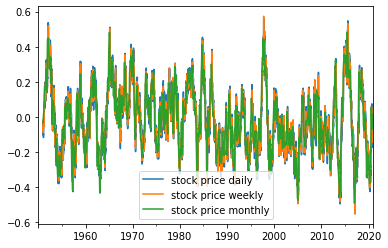

In [17]:
#plot the series avg
sretu_d_r.plot(label='stock price daily')
sretu_w_r.plot(label="stock price weekly")
sretu_m_r.plot(label="stock price monthly")
plt.legend()
plt.show()


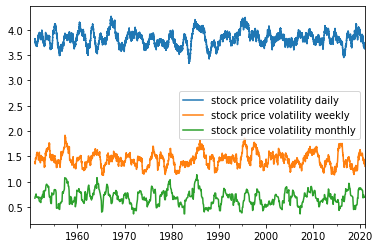

In [18]:
#plot the series avg
sretu_d_r_std.plot(label='stock price volatility daily')
sretu_w_r_std.plot(label="stock price volatility weekly")
sretu_m_r_std.plot(label="stock price volatility monthly")
plt.legend()
plt.show()

comment images above  CHIEDI A CALA

In [38]:
#returns
ret_bins = (sr.shift()-sr) / sr
ret_bins = np.log(ret_bins + 1)
ret_bins = pd.Series(ret_bins, sr.index[1:])
#split the generated data in bins made of 365 days
mean_bins = ret_bins.resample("365D").mean()
#Merton's formula for variance assumes mean = 0
var_bins = np.square(ret_bins)
var_bins = var_bins.resample("365D").mean()



PROBLEM 4

In [ ]:
#setup
import wrds
db=wrds.Connection(wrds_username="sansonet")


Loading library list...
Done


In [ ]:
#dataframe
df=db.raw_sql("select date, ret from crsp.dsf where permco in (7,35048,8048,21446,20792) and date>='2001-01-01' and date<='2020-12-31'")

df.to_csv('csv_file')


In [ ]:
hdf5 = pd.read_csv("csv_file", index_col="date")

In [ ]:
appl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
appl=appl.rename(index=appl["date"], columns={"ret":"appl"})
gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
gs=gs.rename(index=gs["date"], columns={"ret":"gs"})
msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
msft=msft.rename(index=msft["date"], columns={"ret":"msft"})
pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
pg=pg.rename(index=pg["date"], columns={"ret":"pg"})
ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
ge=ge.rename(index=ge["date"], columns={"ret":"ge"})



,date,appl
2001-01-02,2001-01-02,0.000000
2001-01-03,2001-01-03,0.100840
2001-01-04,2001-01-04,0.041985
2001-01-05,2001-01-05,-0.040293
2001-01-08,2001-01-08,0.011450
...,...,...
2020-12-24,2020-12-24,0.007712
2020-12-28,2020-12-28,0.035766
2020-12-29,2020-12-29,-0.013315
2020-12-30,2020-12-30,-0.008527


In [ ]:
dfr = pd.merge(appl,gs, on = "date")
dfr = pd.merge(dfr,msft, on = "date")
dfr = pd.merge(dfr, pg, on = "date")
dfr = pd.merge(dfr,ge, on = "date")
dfr.set_index("date", inplace=True)
dfr.index = pd.to_datetime(dfr.index, format="%Y-%m-%d")
dfr.head()
dfr_m = dfr.resample("M").mean()
dfr_w = dfr.resample("W").mean()
log_dfr = np.log(dfr+1)


In [ ]:
dfr.describe()
dfr_m.describe()
dfr_w.describe()

,appl,gs,msft,pg,ge
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000
mean,0.001533,0.000484,0.000719,0.000430,0.000047
std,0.023170,0.022757,0.018297,0.011860,0.021071
min,-0.179195,-0.189596,-0.147390,-0.087373,-0.151592
25%,-0.009624,-0.009796,-0.007752,-0.005008,-0.008466
50%,0.000949,0.000338,0.000380,0.000373,0.000000
75%,0.012693,0.010721,0.008962,0.005976,0.008404
max,0.139050,0.264678,0.186047,0.120090,0.197031
